<p>
  Data Science Bootcamp <br>
  Capstone - Sprint 2<br>
  Xavier Toledo<br>
</p>

# Water access analysis

Water has become a scarce resource in many communities across Canada. For my capstone project, I will analyze available data and leverage machine learning to predict the effects of different stressors. My goal is to help: 1) Corporations optimize their consumption, 2) Non-profit organizations allocate resources to mitigate human impact, and 3) Federal and Provincial government entities plan infrastructure projects more efficiently.



# Table of Contents
* [Part 1 - Data Cleaning](#p1)
    * [Section 1.1](#s1_1)
    * [Section 1.2](#s1_2)
* [Part 2 - Exploratory Data Analysis](#p2)
    * [Section 2.1](#s2_1)
    * [Section 2.2](#s2_2)
* [Part 3 - Statistical Analysis](#p3)
    * [Section 3.1](#s3_1)
    * [Section 3.2](#s3_2)
* [Part 4 - Machine Learning](#p4)
    * [Section 4.1](#s4_1)
    * [Section 4.2](#s4_2)
* [Part 5 - TBD](#p5)
    * [Section 5.1](#s5_1)
    * [Section 5.2](#s5_2)
* [Part 6 - TBD](#p6)
    * [Section 6.1](#s6_1)
    * [Section 6.2](#s6_2)
* [Part 7 - TBD](#p7)
    * [Section 7.1](#s7_1)
    * [Section 7.2](#s7_2)


# Part 1 - Data Loading and Cleaning <a class="anchor" id="p1"></a>

### Section 1.1 - <a id="s1_1"></a>Data collection

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from scipy.stats import f_oneway
from scipy import stats
from scipy.stats import chi2
import numpy as np

In [ ]:
# Colab

from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Colab

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Water-Qual-Eau-Fraser-2000-present.csv', index_col=0)


In [ ]:
# Importing data

#df = pd.read_csv('data/Water-Qual-Eau-Fraser-2000-present.csv')
# # df2 = pd.read_csv('data/Water-Qual-Eau-Columbia-2000-present.csv')
# # df3 = pd.read_csv('data/Water-Qual-Eau-Peace-Athabasca-2000-present.csv')
# # df4 = pd.read_csv('data/Water-Qual-Eau-Okanagan-Similkameen-2000-present.csv')
# # df5 = pd.read_csv('data/Water-Qual-Eau-Pacific-Coastal-Cote-Pacifique-2000-present.csv')
# # df6 = pd.read_csv('data/Water-Qual-Eau-Saskatchewan-Nelson-2000-present.csv')
# # df7 = pd.read_csv('data/Water-Qual-Eau-S-Saskatchewan-2000-present.csv')
# # df8 = pd.read_csv('data/Water-Qual-Eau-N-Saskatchewan-2000-present.csv')
#



<font color='blue'> In susequent Sprints I will load additional datasets to include the different river basins all over Canada.</font>

### Data Dictionary

<html>

<head>
<meta http-equiv=Content-Type content="text/html; charset=windows-1252">
<meta name=Generator content="Microsoft Word 15 (filtered)">
<!--
 /* Font Definitions */
 @font-face
	{font-family:"Cambria Math";
	panose-1:2 4 5 3 5 4 6 3 2 4;}
@font-face
	{font-family:Calibri;
	panose-1:2 15 5 2 2 2 4 3 2 4;}
 /* Style Definitions */
 p.MsoNormal, li.MsoNormal, div.MsoNormal
	{margin-top:0in;
	margin-right:0in;
	margin-bottom:8.0pt;
	margin-left:0in;
	line-height:107%;
	font-size:11.0pt;
	font-family:"Calibri",sans-serif;}
.MsoPapDefault
	{margin-bottom:8.0pt;
	line-height:107%;}
@page WordSection1
	{size:8.5in 11.0in;
	margin:1.0in 1.0in 1.0in 1.0in;}
div.WordSection1
	{page:WordSection1;}
-->

</head>

<body lang=EN-CA style='word-wrap:break-word'>

<div class=WordSection1>

<table class=MsoNormalTable border=1 cellspacing=0 cellpadding=0 width=630
 style='width:472.25pt;border-collapse:collapse;border:none'>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;padding:
  0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><b><span
  style='color:black'>Variable</span></b></p>
  </td>
  <td width=175 style='width:131.15pt;border:solid windowtext 1.0pt;border-left:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><b><span
  style='color:black'>Column Name</span></b></p>
  </td>
  <td width=307 style='width:230.3pt;border:solid windowtext 1.0pt;border-left:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><b><span
  style='color:black'>Description</span></b></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SAMPLE DATE AND TIME</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>DATE_TIME_HEURE</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SAMPLE DATE AND TIME IN DD/MM/YYYY HH:MM FORMAT USING
  LOCAL TIME ZONE</span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>DATUM</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>DATUM</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>DATUM USED FOR LATITUDE AND LONGITUDE</span></p>
  </td>
 </tr>
 <tr style='height:30.15pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:30.15pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>MEASUREMENT FLAG</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:30.15pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>FLAG_MARQUEUR</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:30.15pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>FLAG APPLICABLE TO MEASUREMENT VALUE (&lt;-LESS THAN,
  T-TRACE VALUE REPORTED BELOW DETECTION LIMIT BY LABORATORY)</span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>LATITUDE</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>LATITUDE</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>LATITUDE IN DECIMAL DEGREES FOR THE NOTED DATUM</span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>LONGITUDE</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>LONGITUDE</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>LONGITUDE IN DECIMAL DEGREES FOR THE NOTED DATUM</span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>METHOD DETECTION LIMIT</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>MDL_LDM</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>METHOD DETECTION LIMIT REPORTED BY THE LABORATORY FOR THE
  NOTED METHOD</span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>METHOD CODE</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>METHOD_CODE</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>NUMERIC ANALYTICAL METHOD CODE FROM THE NATIONAL VMV
  DICTIONARY</span></p>
  </td>
 </tr>
 <tr style='height:30.15pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:30.15pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SHORT METHOD TITLE</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:30.15pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>METHOD_TITLE</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:30.15pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SHORT METHOD TITLE FROM THE NATIONAL VMV DICTIONARY.
  FULL METHOD DESCRIPTIONS AVAILABLE UPON REQUEST AT
  EC.MSQEINFORMATION-WQMSINFORMATION.EC@CANADA.CA</span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>OCEAN DRAINAGE AREA</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>OCEANDA</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>OCEAN DRAINAGE AREA THAT MONITORING SITE IS LOCATED IN </span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>PEARSE DRAINAGE AREA</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>PEARSEDA</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>PEARSE DRAINAGE AREA THAT MONITORING SITE IS LOCATED IN </span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>PROVINCE/TERRITORY</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>PROV_TERR</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>PROVINCE OR TERRITORY THAT MONITORING SITE IS LOCATED IN</span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SAMPLE IDENTIFIER</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SAMPLE_ID_ÉCHANTILLON</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>UNIQUE SAMPLE IDENTIFIER FROM MONITORING PROGRAM</span></p>
  </td>
 </tr>
 <tr style='height:45.25pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:45.25pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SAMPLE DETECTION LIMIT</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:45.25pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SDL_LDE</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:45.25pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SAMPLE DETECTION LIMIT REPORTED BY THE LABORATORY FOR THE
  SPECIFIC ANALYIS OF THE REPORTED MEASUREMENT.  ELEVATED SAMPLE DETECTION
  LIMIT ABOVE METHOD DETECTION LIMITS MAY INDICATE DILUTION, MATRIX
  INTERFERENCE OR OTHER ISSUES WITH THE SPECIFIC ANALYSIS.</span></p>
  </td>
 </tr>
 <tr style='height:30.15pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:30.15pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SITE DESCRIPTION</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:30.15pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SITE_DESC</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:30.15pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SITE DESCRIPTION THAT MAY INCLUDE SPECIFIC SAMPLING
  LOCATION, RATIONALE FOR MONITORING LOCATION (E.G. REFERENCE,
  UPSTREAM/DOWNSTREAM, ETC.), AND LOCAL LAND-USE INFORMATION. </span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SITE NAME</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SITE_NAME</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>FULL SITE NAME FROM MONITORING PROGRAM</span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SITE NUMBER</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SITE_NO</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>UNIQUE SITE NUMBER/IDENTIFICATION FROM MONITORING PROGRAM</span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SITE TYPE</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SITE_TYPE</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SAMPLE SITE TYPE (E.G. RIVER, LAKE, ETC.)</span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>VALIDATION STATUS</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>STATUS_STATUT</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>LEVEL OF VALIDATION (P-PROVISIONAL, V-VALIDATED)</span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>UNIT NAME</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>UNIT_NAME</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>FULL MEASUREMENT UNIT NAME FROM NATIONAL VMV DICTIONARY</span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>UNIT</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>UNIT_UNITÉ</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>MEASUREMENT UNIT ABBREVIATION FROM NATIONAL VMV
  DICTIONARY</span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>MEASUREMENT VALUE</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>VALUE_VALEUR</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>MEASUREMENT VALUE OR CONCENTRATION</span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>VARIABLE NAME</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>VARIABLE</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>VARIABLE NAME FROM NATIONAL VMV DICTIONARY</span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>VARIABLE CODE</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>VARIABLE_CODE</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>NUMERIC VARIABLE CODE FROM NATIONAL VMV DICTIONARY</span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>VARIABLE TYPE</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>VARIABLE_TYPE</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>VARIABLE TYPE FROM NATIONAL VMV DICTIONARY</span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>VMV CODE</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>VMV_CODE</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>NUMERIC VALID METHOD VARIABLE (VMV) CODE FROM NATIONAL
  VMV DICTIONARY</span></p>
  </td>
 </tr>
</table>

<p class=MsoNormal>&nbsp;</p>

</div>

</body>

</html>


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 383346 entries, BC08KA0007 to BC08MH0453
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DATE_TIME_HEURE        383346 non-null  object 
 1   FLAG_MARQUEUR          40187 non-null   object 
 2   VALUE_VALEUR           383346 non-null  float64
 3   SDL_LDE                380675 non-null  float64
 4   MDL_LDM                0 non-null       float64
 5   VMV_CODE               383346 non-null  int64  
 6   UNIT_UNITÉ             383346 non-null  object 
 7   VARIABLE               383346 non-null  object 
 8   VARIABLE_FR            383346 non-null  object 
 9   STATUS_STATUT          383346 non-null  object 
 10  SAMPLE_ID_ÉCHANTILLON  383346 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 35.1+ MB


<font color='blue'> In order to work with this we will need to change data types for a few of the variables.</font>

In [ ]:
df2.info()

NameError: name 'df2' is not defined

In [ ]:
df3.info()

In [ ]:
df4.info()

In [ ]:
df5.info()

In [ ]:
df6.info()

In [ ]:
df7.info()

In [ ]:
df8.info()

In [ ]:
df.head(25)

,DATE_TIME_HEURE,FLAG_MARQUEUR,VALUE_VALEUR,SDL_LDE,MDL_LDM,VMV_CODE,UNIT_UNITÉ,VARIABLE,VARIABLE_FR,STATUS_STATUT,SAMPLE_ID_ÉCHANTILLON
SITE_NO,,,,,,,,,,,
BC08KA0007,2000-01-12 07:45,NaN,59.1000,0.5000,NaN,1131,MG/L,ALKALINITY TOTAL CACO3,ALCALINITÉ TOTALE CACO3,V,00PY000127
BC08KA0007,2000-01-12 07:45,NaN,0.0610,0.0020,NaN,100216,MG/L,ALUMINUM TOTAL,ALUMINIUM TOTAL,V,00PY000127
BC08KA0007,2000-01-12 07:45,NaN,14.5000,0.0100,NaN,100493,µG/L,BARIUM EXTRACTABLE,BARYUM EXTRACTIBLE,V,00PY000127
BC08KA0007,2000-01-12 07:45,NaN,0.0141,0.0002,NaN,100217,MG/L,BARIUM TOTAL,BARYUM TOTAL,V,00PY000127
BC08KA0007,2000-01-12 07:45,<,0.0020,0.0020,NaN,100474,µG/L,BERYLLIUM EXTRACTABLE,BÉRYLLIUM EXTRACTIBLE,V,00PY000127
BC08KA0007,2000-01-12 07:45,<,0.0500,0.0500,NaN,100218,µG/L,BERYLLIUM TOTAL,BÉRYLLIUM TOTAL,V,00PY000127
BC08KA0007,2000-01-12 07:45,NaN,0.7700,0.0700,NaN,100475,µG/L,BORON EXTRACTABLE,BORE EXTRACTIBLE,V,00PY000127
BC08KA0007,2000-01-12 07:45,NaN,0.0070,0.0050,NaN,100491,µG/L,CADMIUM EXTRACTABLE,CADMIUM EXTRACTIBLE,V,00PY000127
BC08KA0007,2000-01-12 07:45,<,0.0001,0.0001,NaN,100219,MG/L,CADMIUM TOTAL,CADMIUM TOTAL,V,00PY000127


In [ ]:
# Displaying the shape of the DataFrame
df.shape

(383346, 11)

In [ ]:
# Checking for Nulls
null_values = df.isnull()

print("Null Values in DataFrame:")
print(null_values)

Null Values in DataFrame:
            DATE_TIME_HEURE  FLAG_MARQUEUR  VALUE_VALEUR  SDL_LDE  MDL_LDM  \
SITE_NO                                                                      
BC08KA0007            False           True         False    False     True   
BC08KA0007            False           True         False    False     True   
BC08KA0007            False           True         False    False     True   
BC08KA0007            False           True         False    False     True   
BC08KA0007            False          False         False    False     True   
...                     ...            ...           ...      ...      ...   
BC08MH0453            False           True         False    False     True   
BC08MH0453            False           True         False    False     True   
BC08MH0453            False           True         False    False     True   
BC08MH0453            False           True         False    False     True   
BC08MH0453            False           

<font color='blue'> Although there are some Null values, they are isolated to the Flag variable which I will not use for my initial Exploratory Data Analysis. Hence, no action taken at this time. </font>

In [ ]:
# Checking for duplicate rows
#duplicate_rows = df[df.duplicated()]

df.duplicated().sum()

#rint("Duplicate Rows except first occurrence based on all columns are :")
#print(duplicate_rows)

0

In [ ]:
# Checking for duplicate columns

df.T.head()

SITE_NO,BC08KA0007,BC08KA0007,BC08KA0007,BC08KA0007,BC08KA0007,BC08KA0007,BC08KA0007,BC08KA0007,BC08KA0007,BC08KA0007,...,BC08MH0453,BC08MH0453,BC08MH0453,BC08MH0453,BC08MH0453,BC08MH0453,BC08MH0453,BC08MH0453,BC08MH0453,BC08MH0453
DATE_TIME_HEURE,2000-01-12 07:45,2000-01-12 07:45,2000-01-12 07:45,2000-01-12 07:45,2000-01-12 07:45,2000-01-12 07:45,2000-01-12 07:45,2000-01-12 07:45,2000-01-12 07:45,2000-01-12 07:45,...,2023-11-20 08:40,2023-11-20 08:40,2023-11-20 08:40,2023-11-20 08:40,2023-11-20 08:40,2023-11-20 08:40,2023-11-20 08:40,2023-11-20 08:40,2023-11-20 08:40,2023-11-20 08:40
FLAG_MARQUEUR,NaN,NaN,NaN,NaN,<,<,NaN,NaN,<,NaN,...,<,NaN,<,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VALUE_VALEUR,59.1,0.061,14.5,0.0141,0.002,0.05,0.77,0.007,0.0001,19.7,...,2.0,5.0,1.0,5.49,122.0,9.7,8.9,6.77,0.118,3.27
SDL_LDE,0.5,0.002,0.01,0.0002,0.002,0.05,0.07,0.005,0.0001,0.1,...,2.0,1.0,1.0,2.0,2.0,0.3,-50.0,0.1,0.003,0.1
MDL_LDM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<font color='blue'> Results show multiple Variables and Sample IDs for each Site, as expected.</font>

In [ ]:
#df['PROV_TERR'].value_counts()

In [ ]:
df['VARIABLE'].value_counts()

SPECIFIC CONDUCTANCE             5811
TURBIDITY                        5811
COLOUR TRUE                      5762
CARBON DISSOLVED ORGANIC         5760
PHOSPHORUS TOTAL DISSOLVED       5734
                                 ... 
CARBONATE (CALCD.)                 19
BICARBONATE (CALCD.)               19
OXYGEN DISSOLVED % SATURATION      11
SILICA REACTIVE                     2
HYDROXIDE (CALCD.)                  1
Name: VARIABLE, Length: 220, dtype: int64

In [ ]:
# Convert 'Variable' column to string
df['VARIABLE'] = df['VARIABLE'].astype(str)

In [ ]:
# Get top 25 Variables for illustration purposes

value_counts = df['VARIABLE'].value_counts()  # Count occurrences of each unique value

top_25_counts = value_counts.nlargest(25)


top_25_counts

In [ ]:
#df.groupby('PROV_TERR').sum(numeric_only=True)

In [ ]:
df.groupby('VARIABLE').sum(numeric_only=True)

,VALUE_VALEUR,SDL_LDE,MDL_LDM,VMV_CODE
VARIABLE,,,,
ALKALINITY GRAN CACO3,1123.2700,28.3000,0.0,362523
ALKALINITY PHENOLPHTHALEIN CACO3,25.8000,25.0000,0.0,56600
ALKALINITY TOTAL CACO3,160359.5500,2104.5000,0.0,13265911
ALUMINUM DISSOLVED,44694.2000,447.0000,0.0,97998633
ALUMINUM EXTRACTABLE,58610.3000,49.6000,0.0,24199592
...,...,...,...,...
ZINC DISSOLVED,598.8500,179.4000,0.0,97705602
ZINC EXTRACTABLE,248.6800,14.8600,0.0,30270972
ZINC TOTAL,14695.1331,788.8466,0.0,584458888


In [ ]:
# Convert 'Variable' column to string
#df['VARIABLE'] = df['VARIABLE'].astype(str)

In [ ]:
df.groupby('SAMPLE_ID_ÉCHANTILLON').sum(numeric_only=True)

,VALUE_VALEUR,SDL_LDE,MDL_LDM,VMV_CODE
SAMPLE_ID_ÉCHANTILLON,,,,
00PY000070,761.6070,9.1084,0.0,2188229
00PY000071,303.8745,9.0884,0.0,2187099
00PY000076,260.2237,6.5866,0.0,2372194
00PY000080,211.1874,8.6884,0.0,2186035
00PY000087,306.3295,8.6884,0.0,2187099
...,...,...,...,...
24PY000130,281.1602,-32.6858,0.0,476870
24PY000135,250.0311,-34.6708,0.0,247181
24PY000137,328.6121,-32.0148,0.0,386882


In [ ]:
df1.sample()

In [ ]:
# Visualizing raw data



In [ ]:
# a TRue/False array, marking whether a row appears more than once
df.duplicated()

SITE_NO
BC08KA0007    False
BC08KA0007    False
BC08KA0007    False
BC08KA0007    False
BC08KA0007    False
              ...  
BC08MH0453    False
BC08MH0453    False
BC08MH0453    False
BC08MH0453    False
BC08MH0453    False
Length: 383346, dtype: bool

In [ ]:
df.duplicated().sum()

0

In [ ]:
# the % of duplicates
df.duplicated().sum()/df.shape[0]*100

0.0

In [ ]:
df.loc[df.duplicated(), :].sort_values("DATE_TIME_HEURE")

,DATE_TIME_HEURE,FLAG_MARQUEUR,VALUE_VALEUR,SDL_LDE,MDL_LDM,VMV_CODE,UNIT_UNITÉ,VARIABLE,VARIABLE_FR,STATUS_STATUT,SAMPLE_ID_ÉCHANTILLON
SITE_NO,,,,,,,,,,,


In [ ]:
df["VALUE_VALEUR"].describe()

count    383346.000000
mean         34.034113
std         319.518647
min         -25.000000
25%           0.027000
50%           0.443000
75%           5.750000
max       43300.000000
Name: VALUE_VALEUR, dtype: float64

In [ ]:
# Converting data types

# Convert DATE_TIME_HEURE to datetime
#df["DATE_TIME_HEURE"] = pd.to_datetime(df["DATE_TIME_HEURE"])

# Convert VALUE_VALEUR to float
#df["VALUE_VALEUR"] = pd.to_numeric(df["VALUE_VALEUR"], errors="coerce")

# Convert SAMPLE_ID_ÉCHANTILLON to a string
#df["SAMPLE_ID_ÉCHANTILLON"] = df["SAMPLE_ID_ÉCHANTILLON"].astype(str)

# Convert 'Variable' column to string
#df['VARIABLE'] = df['VARIABLE'].astype(str)


In [ ]:
# Checking for duplicate reports

boolean = not df[""].is_unique      # True (credit to @Carsten)
boolean = df[""].duplicated().any() # True

ValueError: x and y must have same first dimension, but have shapes (1,) and (383346,)

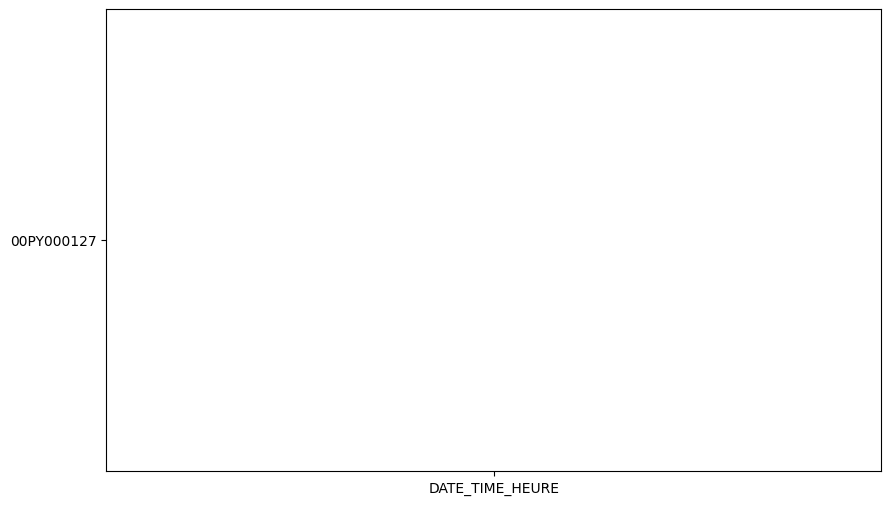

In [ ]:
# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(['DATE_TIME_HEURE'], df['SAMPLE_ID_ÉCHANTILLON'], marker='o', label='Sample ID vs. Date')
plt.xlabel('Date and Time')
plt.ylabel('Sample ID')
plt.title('Sample ID vs. Date and Time')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


<ipython-input-26-f76b6bfd51f6>:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


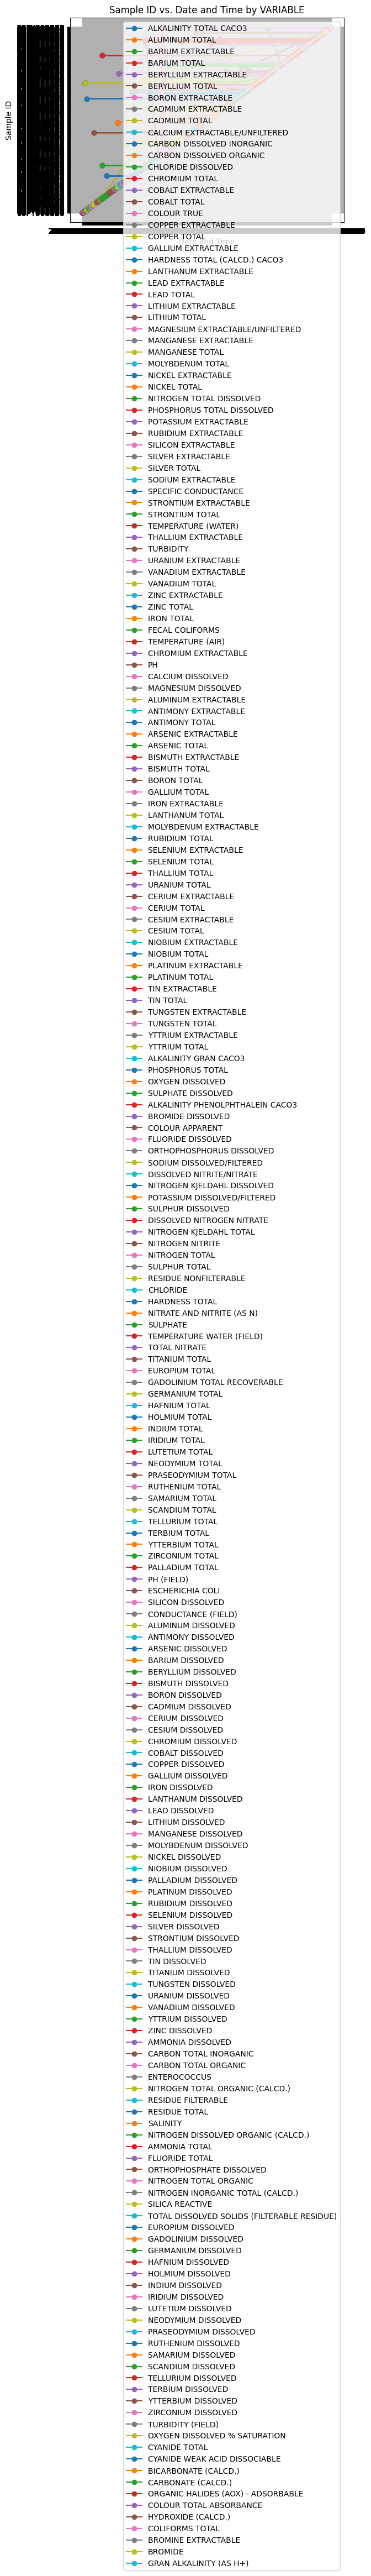

In [ ]:
# Group by VARIABLE and plot the time series for each group
for variable in df['VARIABLE'].unique():
    df_group = df[df['VARIABLE'] == variable]
    plt.plot(df_group['DATE_TIME_HEURE'], df_group['SAMPLE_ID_ÉCHANTILLON'], marker='o', label=variable)

plt.xlabel('Date and Time')
plt.ylabel('Sample ID')
plt.title('Sample ID vs. Date and Time by VARIABLE')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

<font color='blue'> Looking at plots above, is clear that the dataset is rather large and contains multiple variables. Nevertheless, I am not ready to drop any columns.</font>

In [ ]:
# Filter numeric values
numeric_df = df[pd.to_numeric(df["VARIABLE"], errors="coerce").notnull()]

print(numeric_df)


In [ ]:
In [12]: median_column = df["VARIABLE"]

In [13]: type(median_column)
Out[13]: pandas.core.series.Series

In [ ]:

df['VALUE_VALEUR'].mean()


In [ ]:
df = pd.DataFrame(df, index = ['SAMPLE_ID_ÉCHANTILLON'])
df

In [ ]:
# Grouping by the Date and Value columns and calculating mean and median
result = df.groupby("DATE_TIME_HEURE")["VALUE_VALEUR"].agg(["mean", "median"])

print(result)


In [ ]:
# df.groupby(df.date.dt.year)

df.groupby(df['DATE_TIME_HEURE'])

### Section 1.2 - <a id="s1_2"></a> Preliminary visualization and trend analysis

In [ ]:
# Convert 'DATE_TIME_HEURE' to datetime (if not already)
df['DATE_TIME_HEURE'] = pd.to_datetime(df['DATE_TIME_HEURE'])

# Group by VARIABLE and count unique SAMPLE_ID_ÉCHANTILLON values
grouped_counts = df.groupby('VARIABLE')['SAMPLE_ID_ÉCHANTILLON'].nunique()

# Create a bar plot
plt.figure(figsize=(10, 6))
grouped_counts.plot(kind='bar', color='green', edgecolor='black')
#grouped_counts.plot(kind='bar', cmap='viridis', edgecolor='black')

# Remove x-axis ticks and labels
plt.xticks([])  # Hide x-axis ticks
plt.xlabel('')  # Hide x-axis label

plt.xlabel('VARIABLE')
plt.xticks(rotation=45)
plt.ylabel('Unique Sample IDs')
plt.title('Unique Sample IDs by VARIABLE')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
# Group by VARIABLE and count unique SAMPLE_ID_ÉCHANTILLON values
grouped_counts = df1.groupby('VARIABLE')['SAMPLE_ID_ÉCHANTILLON'].nunique()

# Create a scatter plot
plt.figure(figsize=(10, 9))
plt.scatter(grouped_counts.index, grouped_counts.values, c=grouped_counts.values, cmap='viridis', edgecolor='black')

# Remove x-axis ticks and labels
#plt.xticks([])  # Hide x-axis ticks
#plt.xlabel('')  # Hide x-axis label

plt.xlabel('VARIABLE')
plt.xticks(rotation=45)
plt.ylabel('Unique Sample IDs')
plt.title('Unique Sample IDs by VARIABLE (Scatter Plot)')
plt.grid(True)
plt.tight_layout()
plt.show()

<font color='blue'> Attempting to visualize trends.</font>

In [ ]:


# Assuming you have a DataFrame 'df' with columns 'VARIABLE' and 'SAMPLE_ID_ÉCHANTILLON'
# Group by VARIABLE and count unique SAMPLE_ID_ÉCHANTILLON values
grouped_counts = df.groupby('VARIABLE')['SAMPLE_ID_ÉCHANTILLON'].nunique()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(grouped_counts.index, grouped_counts.values, marker='o', color='blue', linestyle='-', label='Unique Sample IDs')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)
plt.xlabel('VARIABLE')
plt.ylabel('Unique Sample IDs')
plt.title('Unique Sample IDs by VARIABLE (Line Plot)')
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
# Filter top 20 variables
top_20_counts = grouped_counts.sort_values(ascending=False).head(20)

# Create colormap based on counts
cmap = plt.cm.viridis
norm = plt.Normalize(top_20_counts.min(), top_20_counts.max())

# Create scatter plot
plt.figure(figsize=(20, 9))
plt.scatter(top_20_counts.index, top_20_counts.values, c=cmap(norm(top_20_counts.values)), edgecolor='black')

# Rotate x-axis ticks for better readability
plt.xticks(rotation=45)  # Adjust the angle as needed (e.g., 90 for vertical)


plt.colorbar(label='Unique Sample IDs')  # Add colorbar to show count legend
plt.show()


In [ ]:
# Get the top 20 variables based on unique sample IDs
top_20_variables = df.groupby('VARIABLE')['SAMPLE_ID_ÉCHANTILLON'].nunique().sort_values(ascending=False).index[:20]

# Create a 5x4 subplot grid for the top 20
fig, axes = plt.subplots(5, 4, figsize=(12, 10))  # Adjust figsize if needed

# Iterate over the top 20 variables and plot on respective subplots
for i, variable in enumerate(top_20_variables):
    row, col = i // 4, i % 4  # Calculate row and column indices
    df_group = df[df['VARIABLE'] == variable]

    axes[row, col].plot(df_group['DATE_TIME_HEURE'], df_group['SAMPLE_ID_ÉCHANTILLON'], marker='o', label=variable)
    axes[row, col].set_title(variable)
    axes[row, col].grid(True)

# Adjust layout and labels
fig.suptitle('Top 20 Sample ID vs. Date and Time by VARIABLE')
plt.xlabel('Date and Time')
plt.ylabel('Sample ID')
plt.tight_layout()
plt.show()


<font color='blue'> By isolating the Top 20 Variables is a lot easier to visualize the data.</font>

In [ ]:
# Imports
import matplotlib.pyplot as plt

# Index represents the unique values in the 'Variable' column, and the values represent the corresponding normalized frequencies.
numeric_df['Variable'].value_counts(normalize=True).plot(kind='bar')
plt.title('Normalized Distribution of Variable')
plt.xlabel('Variable')
plt.ylabel('Relative Frequency')
plt.show()

# Part 2 - Exploratory Data Analysis <a id="p2"></a>

### Section 2.1 - <a id="s2_1"></a> Data wrangling

Null Hypothesis (H0): there is no significant association between VARIABLE (CARBON TOTAL ORGANIC?) occurrence and the SITE
Alternative Hypothesis (H1): there is a significant association between VARIABLE (CARBON TOTAL ORGANIC?) occurrence and the SITE

Being categorical data types, we determine that Chi Squared is the suitable hypothesis test

In [ ]:
# Correlation between numeric values

df1.corr(numeric_only = True)


In [ ]:
# Covariance

In [ ]:
# Plotting

import seaborn as sns
sns.heatmap(df1.corr(numeric_only = True), cmap='coolwarm')
plt.show()

<font color='blue'> There is a strong correlation between the Numeric Valid Method Variable and the Sample Detection Limit.</font>

In [ ]:
# We now perform further analysis to determine if the correlations are statistically significant.
# We will use Pearson correlation tests and we will focus on positively correlated columns.


# Calculating the correlation coefficients and p-values
corr1, pval = stats.pearsonr(df1['VMV_CODE'], df1['SDL_LDE'])
corr2, pval = stats.pearsonr(df1['VMV_CODE'], df1['MDL_LDM'])

# Format p-value manually with 6 decimal places
formatted_pval = f"{pval:.8f}"

# Printing the results
print("-" * 30)
print(f"Numeric Valid Method vs. Sample Detection Limit")
print(f"    - correlation coefficient: {corr1:.4f}")
print(f"    - p-value: {formatted_pval}")
print("-" * 30)

print("-" * 30)
print(f"Numeric Valid Method vs. Method Detection Limit")
print(f"    - correlation coefficient: {corr2:.4f}")
print(f"    - p-value: {formatted_pval}")
print("-" * 30)


# Interpretation
# A correlation coefficient close to 1 indicates a strong positive relationship.
# A correlation coefficient close to -1 indicates a strong negative relationship.
# A p-value close to 0 indicates a statistically significant correlation.


<font color='blue'> In order to proceed, imputation is needed. Caution required.</font>

In [ ]:


# Sample data with missing values and mixed data types
data = {'VMV_CODE': [1, 2, 3, None, 5, 'inf'],
        'SDL_LDE': [10, 12, None, None, 18, 'abc'],
        'MDL_LDM': [8, 11, 13, None, 16, np.inf]}
df = pd.DataFrame(data)

# Handle missing values (e.g., replace with mean or median)
df['VMV_CODE'].fillna(df['VMV_CODE'].mean(), inplace=True)  # Replace NaN with mean
df['SDL_LDE'].fillna(df['SDL_LDE'].median(), inplace=True)  # Replace NaN with median
df['MDL_LDM'] = pd.to_numeric(df['MDL_LDM'], erxrors='coerce')  # Convert to numeric, handle non-numeric

# Calculate correlation coefficients and p-values
corr1, pval1 = stats.pearsonr(df['VMV_CODE'], df['SDL_LDE'])
corr2, pval2 = stats.pearsonr(df['VMV_CODE'], df['MDL_LDM'])

# Format p-values manually with 6 decimal places
formatted_pval1 = f"{pval1:.6f}"
formatted_pval2 = f"{pval2:.6f}"

# Printing the results
print("-" * 30)
print(f"Numeric Valid Method vs. Sample Detection Limit")
print(f"  - correlation coefficient: {corr1:.4f}")
print(f"  - p-value: {formatted_pval1}")
print("-" * 30)

print("-" * 30)
print(f"Numeric Valid Method vs. Method Detection Limit")
print(f"  - correlation coefficient: {corr2:.4f}")
print(f"  - p-value: {formatted_pval2}")
print("-" * 30)


In [ ]:
# Grouping data by VARIABLE and SITE NUMBER
grouped_data = df.groupby(['VARIABLE', 'SITE_NO']).size().unstack()

# Performing Chi-square test
chi2, pval, _, _ = stats.chi2_contingency(grouped_data)

# Printing the p-value
print("p-value:", pval)

# Interpreting results
if pval < 0.05:
    print("Reject the null hypothesis. There is a statistically significant difference in VARIABLE volume among different SITE NUMBERs.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant difference in VARIABLE volume among different SITE NUMBERs.")


<font color='blue'> Revising the hypothesis.</font>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Defining the range for the x-axis (degrees of freedom = 4)
#x = np.arange(0, 20, 0.001)
x = np.linspace(0, 20, 1000)

# Calculating the Chi-square probability density function (PDF)
pdf_values = chi2.pdf(x, df=4)

# Plotting the Chi-square distribution
plt.plot(x, pdf_values, label='Chi-Square (df=4)', color='blue')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Chi-Square Distribution (df=4)')
plt.legend()

# Shade the area corresponding to p-value at the tail
alpha = 0.05  # significance level (adjust as needed)
critical_value = chi2.ppf(1 - alpha, df=4)  # Find the critical value for the given significance level
x_shade = np.linspace(critical_value, x.max(), 100)
plt.fill_between(x_shade, chi2.pdf(x_shade, df=4), color='red', alpha=0.3, label=f'p-value < {alpha}')

# Showing the plot
plt.show()

<font color='blue'>Checking categorical columns.</font>

In [ ]:
# Let's visualize the target distribution

df['VMV_CODE'].value_counts(normalize=True).plot(kind='barh', figsize = (5,5))

plt.xlabel('count for each class')
plt.ylabel('category')
plt.show()

<font color='blue'> Seems inconclusive.</font>

In [ ]:
# Looking at all categorical columns

categorical_columns = df.select_dtypes('object').columns
categorical_columns

In [ ]:
len(categorical_columns[:-1])

In [ ]:
plt.subplots(5, 2, figsize = (10, 20))

for idx, col in enumerate(categorical_columns[:-1]):

    plt.subplot(5,2,idx+1)
    df[col].value_counts().plot(kind='bar')

    plt.title(f'The distribution of {col}')

plt.tight_layout()
plt.show()

<font color='blue'>Further analysis required.</font>

### Section 2.2 - <a id="s2_2"></a> Basic EDA

In [ ]:
# Checking correlation between numeric variables
df1.corr(numeric_only = True)

<font color='blue'> Per above, we see that these columns are positively correlated: WNV Present (0.408), Year (0.129), TrapType_OVI (0.109), and TrapType_SENTINEL (0.128). And that these columns are negatively correlated: Lat (-0.094), Lon (-0.095), TrapType_CDC (-0.262), and TrapType_GRAVID (-0.155)</font>

In [ ]:
# import seaborn as sns
# sns.heatmap(mp2.corr(numeric_only = True), cmap='coolwarm')
# plt.show()
# # looking at the color scale, what do you notice?

<font color='blue'> This heatmap illustrates the correlations between Mosquto number and other numeric variables</font>

In [ ]:
# We now perform further analysis to determine if the correlations are statistically significant.
# We will use Pearson correlation tests and we will focus on positively correlated columns.

# import pandas as pd
# from scipy import stats

# # Calculating the correlation coefficients and p-values
# corr1, pval = stats.pearsonr(mp2['Mosquito number'], mp2['WNV Present'])
# corr2, pval = stats.pearsonr(mp2['Mosquito number'], mp2['Year'])
# corr3, pval = stats.pearsonr(mp2['Mosquito number'], mp2['TrapType_OVI'])
# corr4, pval = stats.pearsonr(mp2['Mosquito number'], mp2['TrapType_SENTINEL'])

# # Format p-value manually with 6 decimal places
# formatted_pval = f"{pval:.8f}"

# # Printing the results
# print("-" * 30)
# print(f"Mosquito number vs. WNV Present")
# print(f"    - correlation coefficient: {corr1:.4f}")
# print(f"    - p-value: {formatted_pval}")
# print("-" * 30)

# print("-" * 30)
# print(f"Mosquito number vs. Year")
# print(f"    - correlation coefficient: {corr2:.4f}")
# print(f"    - p-value: {formatted_pval}")
# print("-" * 30)

# print("-" * 30)
# print(f"Mosquito number vs. TrapType_OVI")
# print(f"    - correlation coefficient: {corr3:.4f}")
# print(f"    - p-value: {formatted_pval}")
# print("-" * 30)

# print("-" * 30)
# print(f"Mosquito number vs. TrapType_SENTINEL")
# print(f"    - correlation coefficient: {corr4:.4f}")
# print(f"    - p-value: {formatted_pval}")
# print("-" * 30)

# # Interpretation
# # A correlation coefficient close to 1 indicates a strong positive relationship.
# # A correlation coefficient close to -1 indicates a strong negative relationship.
# # A p-value close to 0 indicates a statistically significant correlation.


<font color='blue'> Results above show p-values of 0, indicating a statistically significant correlation between specific numeric variables.</font>

In [ ]:
# # We use matplotlib.pyplot.subplots to create a grid of subplots, with each subplot displaying a scatter plot for a different variable pair.

# import matplotlib.pyplot as plt

# # Assuming you have data for multiple variable pairs
# variables = [('Mosquito number', 'WNV Present'), ('Mosquito number', 'Year'), ('Mosquito number', 'TrapType_OVI'), ('Mosquito number', 'TrapType_SENTINEL')]

# # Create a figure and subplots
# fig, axes = plt.subplots(len(variables), 1, figsize=(10, 10))

# # Plot scatterplots for each pair in separate subplots
# for i, (var1, var2) in enumerate(variables):
#     axes[i].scatter(mp2[var1], mp2[var2])
#     axes[i].set_xlabel(var1)
#     axes[i].set_ylabel(var2)
#     axes[i].set_title(f"{var1} vs. {var2}")

# # Adjust layout and show the plot
# fig.tight_layout()
# plt.show()

<font color='blue'> Analysis: We see a clear pattern in the scatterplots. Straight lines suggest a linear relationship between the variables, supporting the significance indicated by the zero p-values. With regards to Mosquito number vs. Year plot, there is no overall trend and hence we conclude that there is no consistent linear relationhip within each year</font>

In [ ]:
# # We now visually conpare multiple relationships

# plt.scatter(mp2['Mosquito number'], mp2['WNV Present'], label='WNV Present', color='red')
# plt.scatter(mp2['Mosquito number'], mp2['Year'], label='Year', color='green')
# plt.scatter(mp2['Mosquito number'], mp2['TrapType_OVI'], label='TrapType_OVI', color='blue')
# plt.scatter(mp2['Mosquito number'], mp2['TrapType_SENTINEL'], label='TrapType_SENTINEL', color='orange')
# plt.xlabel('Mosquito Number')
# plt.ylabel('Trap Type')
# plt.title('Mosquito Number vs. numerical variables')
# plt.legend()
# plt.show()

<font color='blue'> This plot further suggests strong statistical evidence against the null hypothesis (no relationship between variables). </font>

# Part 3 - Statistical Analysis <a id="p3"></a>

### Section 3.1 - <a id="q3_1"></a> TBD

### Section 3.2 - <a id="q3_2"></a>TBD.

<font color='blue'> Interpretation: ......</font>

<font color='blue'> Interpretation: ......</font>

# Part 4 - Advanced Statistical Analysis <a id="p4"></a>

# Part 6 - Machine Learning <a id="p6"></a>

# Part 7 - tbd <a id="p7"></a>